In [2]:
import pandas as pd 
import numpy as np 
import config 
df = pd.read_csv('./wineries.csv')

In [3]:
df

,Winery,Lon,Lat,Passport,PP Days Only
0,Alfaro,-121.819036,36.992783,Y,N
1,Armitage,-121.900122,36.976614,Y,N
2,Bargetto,-121.953222,37.004115,Y,N
3,Big Basin,-122.161585,37.179928,Y,Y
4,Bottle Jack,-122.023633,37.007537,Y,N
5,Burrell School,-121.932106,37.121865,Y,N
6,Partage,-122.193876,37.010958,Y,Y
7,Cinnabar,-122.036244,37.255872,Y,N
8,Clos LaChance,-121.643316,37.073290,Y,N
9,Clos Tita,-121.991160,37.058830,Y,Y


In [4]:
import pysal.esda.mapclassify as mapclassify

import sys
import os
sys.path.append("..") # Adds higher directory to python modules path.  Use to run this example locallay without a global pip install.

from mapboxgl.viz import *
from mapboxgl.utils import *
from mapboxgl.colors import *

In [5]:
token = 'pk.eyJ1IjoibnZvc3MxMjgzOCIsImEiOiJjamJlM3NjNjkyZzRvMzJwZXBsY2tveTVmIn0.rR3InDFY2dvoNjqUAdrGgg'
token = config.plotly_key
data = df_to_geojson(df, precision=4,lat = 'Lat',lon='Lon')


viz = CircleViz(data, access_token=token, height='400px')

In [6]:
import plotly.offline as py_off
from plotly.graph_objs import *
df_open=df[df['PP Days Only']=='N']
df_close = df[df['PP Days Only']=='Y']
data = []
 
Open = (Scattermapbox(
        lon=df_open['Lon'],
        lat=df_open['Lat'],
        mode='markers',
        hoverinfo='text',
        marker=Marker(
            color='purple',size=12
        ),text=df_open['Winery'],name='Always Open'))
PP_Only = (Scattermapbox(
        lon=df_close['Lon'],
        lat=df_close['Lat'],
        mode='markers',
        hoverinfo='text',
        marker=Marker(
            color='orange',size=12
        ),text=df_close['Winery'],name='Passport Days Only'))
data = [Open,PP_Only]
layout = Layout(
    margin=dict(t=0,b=0,r=0,l=0),
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-122
        ),
        pitch=0,
        zoom=8,
        style='outdoors'
    ),
)
 
fig = dict(data=data, layout=layout)
py_off.plot(fig, filename='wineries.html')

'file:///home/nvoss/wine/scava/wineries.html'

In [7]:
df_open=df[df['PP Days Only']=='N']
df_close = df[df['PP Days Only']=='Y']

In [8]:
df_close

,Winery,Lon,Lat,Passport,PP Days Only
3,Big Basin,-122.1616,37.1799,Y,Y
6,Partage,-122.1939,37.0110,Y,Y
9,Clos Tita,-121.9912,37.0588,Y,Y
13,Fellom Ranch Vineyards,-122.1202,37.2960,Y,Y
17,La Honda,-122.2093,37.4819,Y,Y
18,La Rusticana,-121.9420,37.2160,Y,Y
22,McHenry,-122.1515,37.1361,Y,Y
25,Muns,-121.8892,37.1095,Y,Y
26,Naumann,-122.1097,37.3006,Y,Y
31,Portola,-122.1995,37.3715,Y,Y


In [9]:
Scattermapbox?

In [10]:
PP_Only.help('marker')

Current path: []
Current parent object_names: []

With the current parents, 'marker' can be used as follows:

Under ('figure', 'data', 'scattermapbox'):

    editType: calc
    role: object





In [11]:
import mapbox 

In [12]:
import click
import cligj
import json
import math

import mapbox
from pytsp import atsp_tsp, run, dumps_matrix


def split_overlap(a, chunk_size, overlap=1):
    """ Given a list a,
    generate ordered lists no larger than chunk_size
    overlap by given number of places
    chunk[0][-1] = chunk[1][0] when overlap=1
    """
    n = int((len(a) / float(chunk_size)) + 1)
    k = len(a) / n
    m = len(a) % n
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m) + overlap]
            for i in xrange(n))


def great_circle(a, b, R=3959):
    """Calculates distance between two latitude-longitude coordinates.
    default radius in miles
    """
    if a == b:
        return 0
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R


def local_matrix(features, method):
    matrix = []
    for fa in features:
        row = []
        for fb in features:
            pa = fa['geometry']['coordinates']
            pb = fb['geometry']['coordinates']
            if method == 'geodesic':
                dist = great_circle(pa, pb)
            else:  # cartesian
                dist = ((pb[0] - pa[0])**2 + (pb[1] - pa[1])**2) ** 0.5
            row.append(dist)
        matrix.append(row)
    return matrix


def is_lonlat(features):
    for f in features:
        p = f['geometry']['coordinates']
        if p[0] <= -180 or p[1] <= -90 or p[0] >= 180 or p[1] >= 90:
            return False
    return True


def log(txt):
    click.echo("# " + txt, err=True)
def optimal_tour(features, mode, profile, out_points, solver):
    """
    A command line interface for solving the traveling salesman problem
    Input geojson features with point geometries
    and output the optimal tour as geojson feature collection.
     \b
      $ optimal_tour waypoints.geojson | geojson-summary
      19 points and 1 line
    If using geodesic or directions modes, input must be in lonlat coordinates
    Directions mode requires a Mapbox account and a valid token set as
    the - environment variable.
    """
    log("Get point features")
    features = [f for f in features if f['geometry']['type'] == 'Point']
    if len(features) <= 2:
        raise click.UsageError(
            "Need at least 3 point features to create route")

    if mode != 'cartesian' and not is_lonlat(features):
        raise click.UsageError(
            "For this {} mode, input must be in lonlat coordinates".format(
                mode))

    log("Create travel cost matrix")
    if mode == 'cartesian':
        matrix = local_matrix(features, 'cartesian')
    elif mode == 'geodesic':
        matrix = local_matrix(features, 'geodesic')
    elif mode == 'directions':
        dist_api = mapbox.Distance()
        res = dist_api.distances(features, profile=profile)
        if res.status_code == 200:
            matrix = res.json()['durations']
        else:
            raise Exception("Got a {0} error from the Distances API: {1}".format(
                res.status_code, res.content))

    log("Prep data")
    matrix_sym = atsp_tsp(matrix, strategy="avg")

    outf = "/tmp/myroute.tsp"
    with open(outf, 'w') as dest:
        dest.write(dumps_matrix(matrix_sym, name="My Route"))

    log("Run TSP solver")
    tour = run(outf, start=0, solver=solver)
    order = tour['tour']

    features_ordered = [features[i] for i in order]

    log("Create lines connecting the tour")
    if mode == 'directions':
        # gather geojson linestring features along actual route via directions
        directions_api = mapbox.Directions()
        route_features = []
        for chunk in split_overlap(features_ordered + [features_ordered[0]], 24):
            res = directions_api.directions(chunk, profile='mapbox.' + profile)
            if res.status_code == 200:
                route_features.append(res.geojson()['features'][0])
            else:
                raise Exception(
                    "Got a {0} error from the Directions API: {1}".format(
                        res.status_code, res.content))
    else:
        # Alternative, straight line distance between points
        route_coords = [f['geometry']['coordinates'] for f in features_ordered]
        route_coords.append(features_ordered[0]['geometry']['coordinates'])
        route_features = [{
            'type': 'Feature',
            'properties': {'tour': tour},
            'geometry': {
                'type': 'LineString',
                'coordinates': route_coords}}]

    # meld into one geojson feature collection
    log("Output feature collection")
    out_features = route_features
    if out_points:
        out_features += features_ordered

    collection = {
        'type': 'FeatureCollection',
        'features': out_features}

In [13]:
import geojson

In [14]:
def df_to_geojson(df, properties, lat='Lat', lon='Lon'):
    """
    Turn a dataframe containing point data into a geojson formatted python dictionary
    
    df : the dataframe to convert to geojson
    properties : a list of columns in the dataframe to turn into geojson feature properties
    lat : the name of the column in the dataframe that contains latitude data
    lon : the name of the column in the dataframe that contains longitude data
    """
    
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [15]:
feat = df_to_geojson(df_close,properties=['Winery'])

In [16]:
feat

{'features': [{'geometry': {'coordinates': [-122.1616, 37.1799],
    'type': 'Point'},
   'properties': {'Winery': 'Big Basin'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1939, 37.011], 'type': 'Point'},
   'properties': {'Winery': 'Partage'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121.9912, 37.0588], 'type': 'Point'},
   'properties': {'Winery': 'Clos Tita'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1202, 37.296], 'type': 'Point'},
   'properties': {'Winery': 'Fellom Ranch Vineyards'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.2093, 37.4819], 'type': 'Point'},
   'properties': {'Winery': 'La Honda'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121.942, 37.216], 'type': 'Point'},
   'properties': {'Winery': 'La Rusticana '},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1515, 37.1361], 'type': 'Point'},
   'properties': {'Winery': 'McHenry '},
   'type': 'Feature'},
  {'geometry': {'coordi

In [17]:
directions_api = mapbox.Directions(access_token=token)

In [18]:
res = directions_api.directions(feat['features'][0:12])


In [19]:
res.geojson()['features'][0]

{'geometry': {'coordinates': [[-122.1616, 37.1799],
   [-122.162036, 37.17974],
   [-122.162604, 37.179621],
   [-122.162701, 37.179151],
   [-122.163237, 37.178913],
   [-122.163806, 37.178586],
   [-122.163838, 37.178159],
   [-122.163776, 37.177545],
   [-122.163581, 37.177321],
   [-122.163015, 37.17705],
   [-122.162808, 37.176689],
   [-122.162676, 37.176445],
   [-122.162479, 37.176213],
   [-122.16269, 37.175834],
   [-122.163205, 37.175449],
   [-122.163476, 37.174745],
   [-122.163763, 37.17403],
   [-122.163676, 37.173145],
   [-122.163776, 37.172845],
   [-122.164936, 37.172769],
   [-122.165905, 37.172298],
   [-122.165708, 37.171708],
   [-122.165417, 37.171219],
   [-122.164903, 37.170589],
   [-122.164544, 37.170255],
   [-122.164006, 37.170028],
   [-122.16332, 37.169627],
   [-122.163151, 37.1692],
   [-122.163269, 37.168773],
   [-122.163361, 37.168529],
   [-122.163557, 37.168214],
   [-122.163594, 37.167942],
   [-122.163454, 37.167364],
   [-122.163637, 37.166947]

In [20]:
from plotly.graph_objs import *

data = Data([
        Scattermapbox(
            lat=[item_x[1] for item_x in res.geojson()['features'][0]['geometry']['coordinates']],
            lon=[item_y[0] for item_y in res.geojson()['features'][0]['geometry']['coordinates']],
            mode='markers+lines',
            marker=Marker(
                size=3
            ),
        )
    ])
layout = Layout(
    margin=dict(t=0,b=0,r=0,l=0),
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-122
        ),
        pitch=0,
        zoom=8,
        style='outdoors'
    ),
)
 
fig = dict(data=data, layout=layout)
py_off.plot(fig, filename='trip.html')

'file:///home/nvoss/wine/scava/trip.html'

In [21]:
res.geojson()['features'][0]['geometry']['coordinates']

[[-122.1616, 37.1799],
 [-122.162036, 37.17974],
 [-122.162604, 37.179621],
 [-122.162701, 37.179151],
 [-122.163237, 37.178913],
 [-122.163806, 37.178586],
 [-122.163838, 37.178159],
 [-122.163776, 37.177545],
 [-122.163581, 37.177321],
 [-122.163015, 37.17705],
 [-122.162808, 37.176689],
 [-122.162676, 37.176445],
 [-122.162479, 37.176213],
 [-122.16269, 37.175834],
 [-122.163205, 37.175449],
 [-122.163476, 37.174745],
 [-122.163763, 37.17403],
 [-122.163676, 37.173145],
 [-122.163776, 37.172845],
 [-122.164936, 37.172769],
 [-122.165905, 37.172298],
 [-122.165708, 37.171708],
 [-122.165417, 37.171219],
 [-122.164903, 37.170589],
 [-122.164544, 37.170255],
 [-122.164006, 37.170028],
 [-122.16332, 37.169627],
 [-122.163151, 37.1692],
 [-122.163269, 37.168773],
 [-122.163361, 37.168529],
 [-122.163557, 37.168214],
 [-122.163594, 37.167942],
 [-122.163454, 37.167364],
 [-122.163637, 37.166947],
 [-122.163664, 37.166553],
 [-122.163567, 37.165871],
 [-122.163363, 37.16557],
 [-122.163187

In [22]:
directions_api = mapbox.DirectionsMatrix(access_token=token)

In [23]:
#add home into matrix of features 
feat = {'features':feat['features'][0:24]}
feat['features'].append({'geometry': {'coordinates': [ -121.945778,37.281630],
    'type': 'Point'},
   'properties': {'Winery': 'Home'},
   'type': 'Feature'})

In [24]:
feat

{'features': [{'geometry': {'coordinates': [-122.1616, 37.1799],
    'type': 'Point'},
   'properties': {'Winery': 'Big Basin'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1939, 37.011], 'type': 'Point'},
   'properties': {'Winery': 'Partage'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121.9912, 37.0588], 'type': 'Point'},
   'properties': {'Winery': 'Clos Tita'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1202, 37.296], 'type': 'Point'},
   'properties': {'Winery': 'Fellom Ranch Vineyards'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.2093, 37.4819], 'type': 'Point'},
   'properties': {'Winery': 'La Honda'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121.942, 37.216], 'type': 'Point'},
   'properties': {'Winery': 'La Rusticana '},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1515, 37.1361], 'type': 'Point'},
   'properties': {'Winery': 'McHenry '},
   'type': 'Feature'},
  {'geometry': {'coordi

In [25]:
from collections import OrderedDict
d = feat['features']
feat

{'features': [{'geometry': {'coordinates': [-122.1616, 37.1799],
    'type': 'Point'},
   'properties': {'Winery': 'Big Basin'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1939, 37.011], 'type': 'Point'},
   'properties': {'Winery': 'Partage'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121.9912, 37.0588], 'type': 'Point'},
   'properties': {'Winery': 'Clos Tita'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1202, 37.296], 'type': 'Point'},
   'properties': {'Winery': 'Fellom Ranch Vineyards'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.2093, 37.4819], 'type': 'Point'},
   'properties': {'Winery': 'La Honda'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-121.942, 37.216], 'type': 'Point'},
   'properties': {'Winery': 'La Rusticana '},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-122.1515, 37.1361], 'type': 'Point'},
   'properties': {'Winery': 'McHenry '},
   'type': 'Feature'},
  {'geometry': {'coordi

In [26]:

res = directions_api.matrix()
res.geojson()['features'][0]

TypeError: matrix() missing 1 required positional argument: 'coordinates'

In [27]:
res = directions_api.matrix(feat['features'])

In [28]:
cols = [f['properties']['Winery'] for f in feat['features']]

data = res.json()['durations']


In [29]:
 feat['features'][0]['properties']['Winery']

'Big Basin'

In [30]:
df_dur_1 = pd.DataFrame(np.matrix(data)/60.0,columns = cols,index = cols)

In [31]:
df_dur

NameError: name 'df_dur' is not defined

Populating the interactive namespace from numpy and matplotlib


/home/nvoss/tools/anaconda2/envs/wine/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['log', 'Annotation', 'Figure']
`%matplotlib` prevents importing * from pylab and numpy



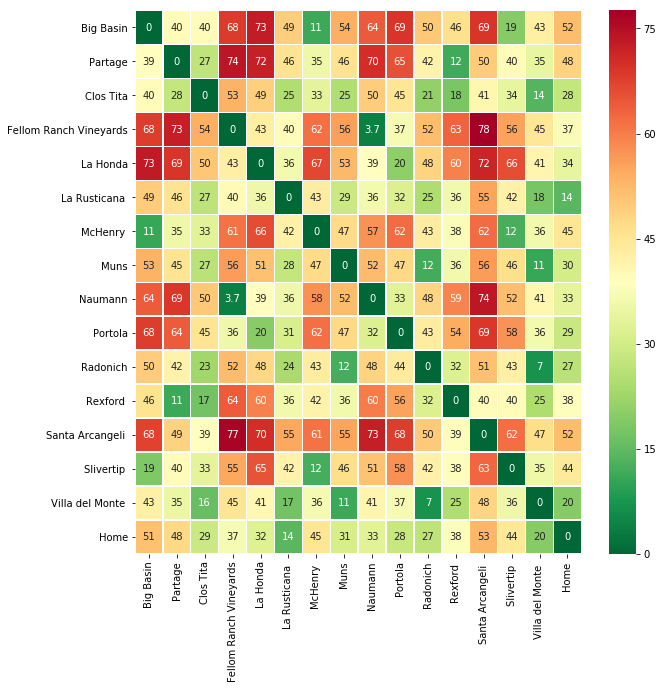

In [32]:
import seaborn as sns 
%pylab inline
plt.figure(figsize=(10,10))
sns.heatmap(df_dur_1, cmap='RdYlGn_r', linewidths=0.5, annot=True)


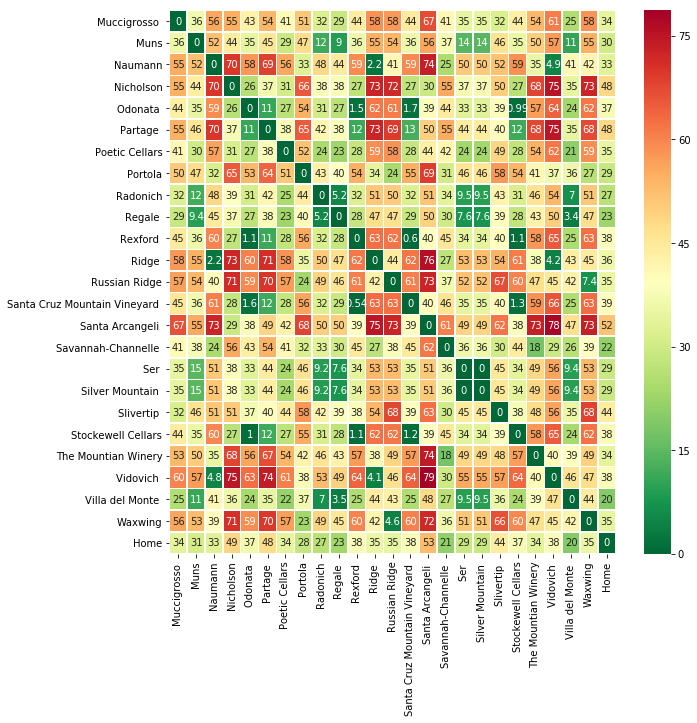

In [33]:
#do second half of wineries beuase API call limits to 25
feat = df_to_geojson(df,properties=['Winery'])
feat = {'features':feat['features'][24:48]}
feat['features'].append({'geometry': {'coordinates': [ -121.945778,37.281630],
    'type': 'Point'},
   'properties': {'Winery': 'Home'},
   'type': 'Feature'})
res = directions_api.matrix(feat['features'])
cols = [f['properties']['Winery'] for f in feat['features']]

data = res.json()['durations']
df_dur_2 = pd.DataFrame(np.matrix(data)/60.0,columns = cols,index = cols)
plt.figure(figsize=(10,10))
sns.heatmap(df_dur_2, cmap='RdYlGn_r', linewidths=0.5, annot=True)

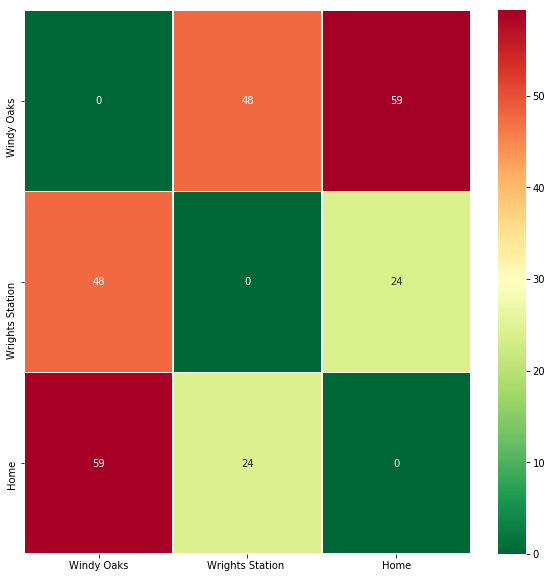

In [34]:
#do second half of wineries beuase API call limits to 25
feat = df_to_geojson(df,properties=['Winery'])
feat = {'features':feat['features'][48:]}
feat['features'].append({'geometry': {'coordinates': [ -121.945778,37.281630],
    'type': 'Point'},
   'properties': {'Winery': 'Home'},
   'type': 'Feature'})
res = directions_api.matrix(feat['features'])
cols = [f['properties']['Winery'] for f in feat['features']]

data = res.json()['durations']
df_dur_3 = pd.DataFrame(np.matrix(data)/60.0,columns = cols,index = cols)
plt.figure(figsize=(10,10))
sns.heatmap(df_dur_3, cmap='RdYlGn_r', linewidths=0.5, annot=True)

# algorithm for finding least time between vineyards starting from home 

1. Find closest winery
2. find closest winery to previous winery
3. Flip route so that most driving is initially



In [46]:
def max_wineries(df,num_vineyards):
    vineyards = []
    time = []
    current = 'Home'
    while len(vineyards)<num_vineyards:
        if current not in vineyards and not 'Home':
            print(current)
            spot = df[current].sort_values().index[1]
            current = spot 
            time.append(df[current].sort_values()[1])
            vineyards.append(current)
        else:
            for i,index in enumerate(df[current].sort_values().index[1:]):
                if index not in vineyards and index !='Home': 
                    time.append(df[current].sort_values()[1:][i])
                    vineyards.append(index)
                    current=index
                    break 
              
                    
            
                    
                    
 
    return vineyards,time

v,t = max_wineries(df_dur_1,10)
print(v,t)
    

['La Rusticana ', 'Villa del Monte ', 'Radonich', 'Muns', 'Clos Tita', 'Rexford ', 'Partage', 'McHenry ', 'Big Basin', 'Slivertip '] [14.445, 16.986666666666668, 7.0049999999999999, 11.875, 25.133333333333333, 17.074999999999999, 11.543333333333333, 35.368333333333332, 11.495000000000001, 18.545000000000002]


Now get the coordinates and make new dataframe 

In [57]:
df_close=df_close.set_index('Winery')
df_tour = df_close.loc[v]


In [58]:
df_tour

,Lon,Lat,Passport,PP Days Only
Winery,,,,
La Rusticana,-121.9420,37.2160,Y,Y
Villa del Monte,-121.9616,37.1325,Y,Y
Radonich,-121.9031,37.1070,Y,Y
Muns,-121.8892,37.1095,Y,Y
Clos Tita,-121.9912,37.0588,Y,Y
Rexford,-122.0486,36.9584,Y,Y
Partage,-122.1939,37.0110,Y,Y
McHenry,-122.1515,37.1361,Y,Y
Big Basin,-122.1616,37.1799,Y,Y


In [70]:
directions_api = mapbox.Directions(access_token=token)
df_tour['Winery']=df_tour.index
feat = df_to_geojson(df_tour,properties=['Winery'])
feat['features'].append({'geometry': {'coordinates': [ -121.945778,37.281630],
    'type': 'Point'},
   'properties': {'Winery': 'Home'},
   'type': 'Feature'})
res = directions_api.directions(feat['features'])

data = Data([
        Scattermapbox(
            lat=[item_x[1] for item_x in res.geojson()['features'][0]['geometry']['coordinates']],
            lon=[item_y[0] for item_y in res.geojson()['features'][0]['geometry']['coordinates']],
            mode='markers+lines',
            marker=Marker(
                size=3
            ),
        ),
        (Scattermapbox(
        lon=df_tour['Lon'],
        lat=df_tour['Lat'],
        mode='markers',
        hoverinfo='text',
        marker=Marker(
            color='purple',size=12
        ),text=df_tour['Winery'],name='Stops'))
    ])
layout = Layout(
    margin=dict(t=0,b=0,r=0,l=0),
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-122
        ),
        pitch=0,
        zoom=8,
        style='outdoors'
    ),
)
 
fig = dict(data=data, layout=layout)
py_off.plot(fig, filename='tour.html')

'file:///home/nvoss/wine/scava/tour.html'

In [65]:
df_tour


,Lon,Lat,Passport,PP Days Only,Winery
Winery,,,,,
La Rusticana,-121.9420,37.2160,Y,Y,La Rusticana
Villa del Monte,-121.9616,37.1325,Y,Y,Villa del Monte
Radonich,-121.9031,37.1070,Y,Y,Radonich
Muns,-121.8892,37.1095,Y,Y,Muns
Clos Tita,-121.9912,37.0588,Y,Y,Clos Tita
Rexford,-122.0486,36.9584,Y,Y,Rexford
Partage,-122.1939,37.0110,Y,Y,Partage
McHenry,-122.1515,37.1361,Y,Y,McHenry
Big Basin,-122.1616,37.1799,Y,Y,Big Basin
